## Survival Analysis - Homework3| Hovhannisyan Emma

In [44]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import LogNormalAFTFitter

In [45]:

# Importing distributions
from lifelines import WeibullFitter, ExponentialFitter, LogNormalFitter, LogLogisticFitter


#### Making data ready

In [3]:
#reading the dataframe
df = pd.read_csv("telco.csv")
df.head()

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No


#### In the following steps we are going to add espislion value to 0 s that exist in  tenure column as the modles work only for positive integers. Also all categorical columns into dummies and churn to binary.

In [4]:
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})

#Below you can see the columns that we need to encode
encode_cols = ['region', 'marital', 'ed', 'retire', 'gender', 'voice', 'internet', 'forward', 'custcat']

#creating dataframe with dummy variables
df2 = pd.get_dummies(df,
               columns=encode_cols,
               prefix=encode_cols,
               drop_first=True)

# Adding 0.0000001 epsilion to all 0s in tenure column
df2["tenure"] = np.where(df2["tenure"] == 0, 0.0000001, df2["tenure"])
df2.head()

,ID,tenure,age,address,income,churn,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,...,ed_Post-undergraduate degree,ed_Some college,retire_Yes,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service
0,1,13.0,44,9,64,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,2,11.0,33,7,136,1,0,1,0,0,...,1,0,0,1,1,0,1,0,0,1
2,3,68.0,52,24,116,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,4,33.0,33,12,33,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,23.0,30,9,30,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [5]:
df2.head()

,ID,tenure,age,address,income,churn,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,...,ed_Post-undergraduate degree,ed_Some college,retire_Yes,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service
0,1,13.0,44,9,64,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,2,11.0,33,7,136,1,0,1,0,0,...,1,0,0,1,1,0,1,0,0,1
2,3,68.0,52,24,116,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,4,33.0,33,12,33,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,23.0,30,9,30,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0


#### Now our dataframe is ready it's time to go with our models

## Building AFT models 

In [23]:
#In the following step we are creating instances for each fitter
wf = wf_aft()
lnf = lnf_aft()
llf = llf_aft()
ex = ExponentialFitter()

In [38]:
#In the following step we are creating instances for each fitter
wb = WeibullFitter()
ex = ExponentialFitter()
log = LogNormalFitter()
loglogis = LogLogisticFitter()

In [39]:
#plotting

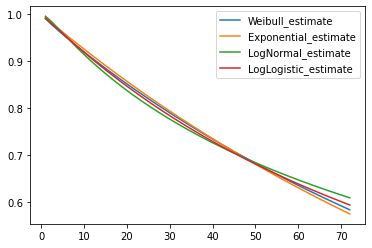

In [37]:
for model in [wb, ex, log, loglogis]:
    model.fit(durations = df["tenure"], event_observed = df["churn"])
    model.plot_survival_function(ci_show=False)

In [40]:
#Although from the plot we can see that LogNormalis the best model, lets peint AIC as well

In [43]:
for model in [wb, ex, log, loglogis]:
    model.fit(durations = df2["tenure"], event_observed =df2["churn"])
    # Print AIC to understand which model is performing better. The smaller the AIC the better.
    print("The AIC value for", model.__class__.__name__, "is",  model.AIC_)

The AIC value for WeibullFitter is 3216.8611706815464
The AIC value for ExponentialFitter is 3215.9608134637247
The AIC value for LogNormalFitter is 3209.0351474316735
The AIC value for LogLogisticFitter is 3214.4154757933375


#### The AIC value for LogNormalFitter is 3209.0351474316735 so we will choose this model

## The model

In [46]:
lnf = LogNormalAFTFitter()
lnf.fit(df2, duration_col='tenure', event_col='churn')
lnf.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.10
         time fit was run = 2023-04-30 20:16:51 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    address                 0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                     0.04       1.04       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service       1.03       2.79       0.17             0.69             1.36                 2.00                 3.89
       custcat_Plus service    0.82       2.28       0.17             0.49             1.15                 1.63                 3.17
       custcat_Total service   1.01       2.75       0.21             0.60             1.42                 1.83                 4.15
       internet_Yes           -0.84       0.43       0.14            -1.11            -0.57                 0.33                 0.57
       marital_Unmarried      -0.45       0.64       0.11            -0.67            -0.22                 0.51                 0.80
       voice_Yes              -0.46       0.63       0.17            -0.79            -0.14                 0.45                 0.87
       Intercept               2.53      12.62       0.24             2.06             3.01                 7.84                20.30
sigma_ Intercept               0.28       1.33       0.05             0.19             0.37                 1.21                 1.45

                               cmp to     z      p   -log2(p)
param  covariate                                             
mu_    address                   0.00  4.84 <0.005      19.56
       age                       0.00  5.75 <0.005      26.78
       custcat_E-service         0.00  6.07 <0.005      29.53
       custcat_Plus service      0.00  4.85 <0.005      19.66
       custcat_Total service     0.00  4.83 <0.005      19.52
       internet_Yes              0.00 -6.08 <0.005      29.63
       marital_Unmarried         0.00 -3.91 <0.005      13.39
       voice_Yes                 0.00 -2.78   0.01       7.52
       Intercept                 0.00 10.45 <0.005      82.47
sigma_ Intercept                 0.00  6.15 <0.005      30.27
---
Concordance = 0.78
AIC = 2944.20
log-likelihood ratio test = 280.83 on 8 df
-log2(p) of ll-ratio test = 183.73

## Keeping Significant features

#### From the summary we can conclude that the significant features are: address, age, custcat_E-service, custcat_Plus service, custcat_Total service, internet_Yes, marital_Unmarried, voice_Yes according to their p-values

## Significant features of the chosen model

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.10
         time fit was run = 2023-04-30 19:58:02 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    address                 0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                     0.04       1.04       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service       1.03       2.79       0.17             0.69             1.36                 2.00                 3.89
       custcat_Plus service    0.82       2.28       0.17             0.49             1.15                 1.63                 3.17
       custcat_Total service   1.01       2.75       0.21             0.60             1.42                 1.83                 4.15
       internet_Yes           -0.84       0.43       0.14            -1.11            -0.57                 0.33                 0.57
       marital_Unmarried      -0.45       0.64       0.11            -0.67            -0.22                 0.51                 0.80
       voice_Yes              -0.46       0.63       0.17            -0.79            -0.14                 0.45                 0.87
       Intercept               2.53      12.62       0.24             2.06             3.01                 7.84                20.30
sigma_ Intercept               0.28       1.33       0.05             0.19             0.37                 1.21                 1.45

                               cmp to     z      p   -log2(p)
param  covariate                                             
mu_    address                   0.00  4.84 <0.005      19.56
       age                       0.00  5.75 <0.005      26.78
       custcat_E-service         0.00  6.07 <0.005      29.53
       custcat_Plus service      0.00  4.85 <0.005      19.66
       custcat_Total service     0.00  4.83 <0.005      19.52
       internet_Yes              0.00 -6.08 <0.005      29.63
       marital_Unmarried         0.00 -3.91 <0.005      13.39
       voice_Yes                 0.00 -2.78   0.01       7.52
       Intercept                 0.00 10.45 <0.005      82.47
sigma_ Intercept                 0.00  6.15 <0.005      30.27
---
Concordance = 0.79
AIC = 2944.20
log-likelihood ratio test = 280.83 on 8 df
-log2(p) of ll-ratio test = 183.73

<AxesSubplot:xlabel='log(accelerated failure rate) (95% CI)'>

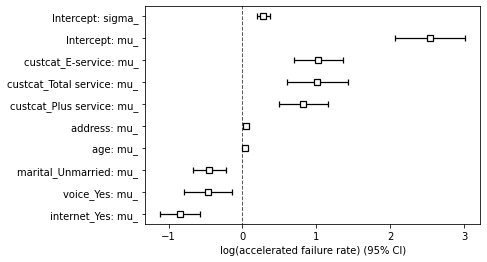

In [8]:
df2 = df2[["tenure", "churn", "address", "age", "custcat_E-service", "custcat_Plus service", "custcat_Total service", "internet_Yes", "marital_Unmarried", "voice_Yes"]]
lnf.fit(df2, duration_col='tenure', event_col='churn')
lnf.print_summary()
lnf.plot()

### AIC decreased => significant model's selection worked

## Calculating CLV's

In [48]:
#Getting pred for only 1 year

In [47]:
pred = lnf.predict_survival_function(df2)[:12]
pred

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
1.0,0.999688,0.999736,0.999999,0.997985,0.999870,0.999934,0.996781,0.993548,0.999994,0.999997,...,0.999828,0.999961,0.999668,1.000000,0.999781,0.996036,0.995073,0.999991,0.999923,0.999471
2.0,0.998129,0.998378,0.999988,0.990703,0.999127,0.999519,0.986180,0.975242,0.999946,0.999965,...,0.998883,0.999699,0.998022,0.999998,0.998622,0.983532,0.980236,0.999915,0.999446,0.997040
3.0,0.995250,0.995831,0.999956,0.979723,0.997635,0.998631,0.971075,0.951403,0.999818,0.999879,...,0.997036,0.999113,0.995004,0.999992,0.996407,0.966176,0.960211,0.999724,0.998443,0.992790
4.0,0.991268,0.992267,0.999893,0.966472,0.995448,0.997273,0.953528,0.925327,0.999593,0.999724,...,0.994377,0.998186,0.990846,0.999979,0.993269,0.946364,0.937776,0.999396,0.996923,0.987122
5.0,0.986400,0.987874,0.999796,0.951860,0.992655,0.995483,0.934724,0.898616,0.999264,0.999491,...,0.991029,0.996934,0.985782,0.999957,0.989366,0.925411,0.914381,0.998926,0.994934,0.980384
6.0,0.980833,0.982817,0.999659,0.936468,0.989349,0.993308,0.915365,0.872090,0.998828,0.999179,...,0.987108,0.995383,0.980004,0.999925,0.984837,0.904064,0.890812,0.998314,0.992532,0.972845
7.0,0.974715,0.977228,0.999483,0.920676,0.985608,0.990795,0.895877,0.846177,0.998286,0.998785,...,0.982712,0.993560,0.973669,0.999880,0.979801,0.882762,0.867512,0.997565,0.989769,0.964713
8.0,0.968166,0.971217,0.999264,0.904736,0.981502,0.987984,0.876524,0.821099,0.997643,0.998313,...,0.977926,0.991495,0.966899,0.999824,0.974355,0.861767,0.844730,0.996685,0.986693,0.956144
9.0,0.961281,0.964870,0.999004,0.888819,0.977091,0.984916,0.857473,0.796960,0.996902,0.997763,...,0.972818,0.989211,0.959795,0.999753,0.968579,0.841235,0.822606,0.995682,0.983348,0.947260
10.0,0.954136,0.958260,0.998703,0.873040,0.972424,0.981623,0.838827,0.773801,0.996068,0.997139,...,0.967448,0.986734,0.952434,0.999669,0.962537,0.821255,0.801210,0.994563,0.979769,0.938154


## Calculate CLV for each person and adding to the new column of the dataframe

In [49]:
monthly_margin = 1300 #assumption
pred = pred*monthly_margin
rate  = 0.2 #just for fun

pred = pd.DataFrame({col: [pred.iloc[row-1, col-1] / (1 + rate)**(row-1) for row in range(1, 13)] for col in range(1, len(pred.columns)+1)})


In [57]:
#adding clv in our original dataframe
df["CLV"] = pred[12]

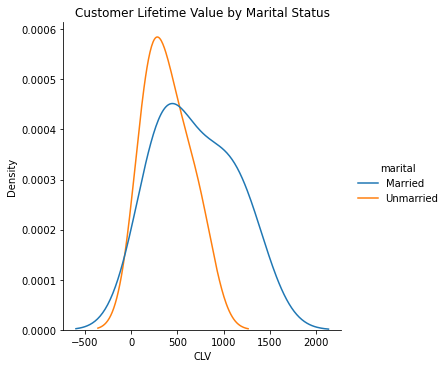

In [59]:
clv_martial = sns.displot(df, x = 'CLV', kind = 'kde', hue = 'marital')
clv_martial.set(title='Customer Lifetime Value by Marital Status')

#### Mrried customers are more likely to survive

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


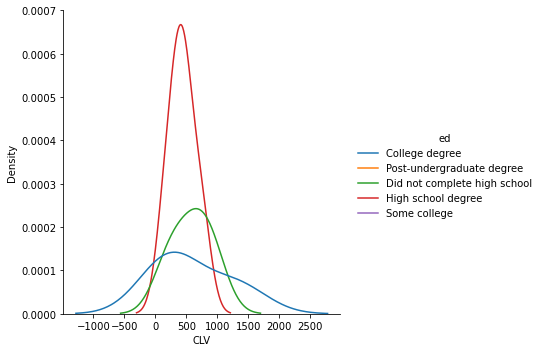

In [61]:
clv_ed = sns.displot(df, x = 'CLV', kind = 'kde', hue = 'ed')
clv_martial.set(title='Customer Lifetime Value by EDucation')

### Did not complete High school/ college degree customers are more likely to survive

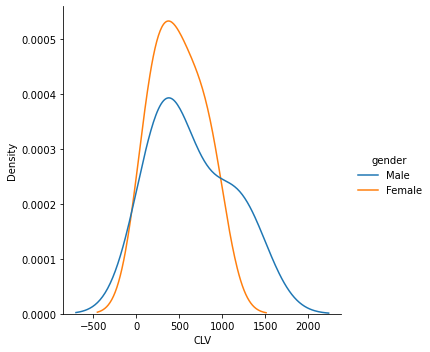

In [63]:
clv_gender = sns.displot(df, x = 'CLV', kind = 'kde', hue = 'gender')
clv_martial.set(title='Customer Lifetime Value by Gender')

### Males are most likly to survive

As we've seen previously in the summary of our final model the coefficients of the age, address, custcatE-service, custcatPlus service, and custcatTotal service are positive meaning people who are older are less likely to churn. Also, the customers that have not taken the basic service(the one emitted when binarizing) are less likely to churn. Moreover, the coefficients for the
maritalUnmarried, Voice option, and internet option are negative. This means that the customers that have
taken internet and voice service have a lower survival rate. Also, not being married makes the customer more
likely to churn.

## Vulnarable segments are written under each plot

## Retention

To determine the amount of money we can expect to earn in a year based on the current moment and currency unit, we can simply sum up the values in the CLV column of our dataframe. This is because the CLV is the product of the probability of customer survival and the amount of money that the customer is expected to bring in.

In [65]:
sum_clv =  np.sum(df['CLV'])
print(sum_clv)

6784.353507230808
